# Setting up

In [2]:
import random
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import datetime
import pycountry_convert as pc

In [6]:
data = pd.read_csv('customer_information.csv')
data.head(10)

,given_name,surname,gender,birthdate,country_of_birth,current_country,phone_number,postcode,national_insurance_number,bank_account_number,cc_status,weight,height,blood_group,avg_n_drinks_per_week,avg_n_cigret_per_week,education_level,n_countries_visited
0,Lorraine,Reed,F,05/07/1984,Armenia,United Kingdom,(07700) 900876,LS5 8FN,ZZ 19 48 92 T,51157818,0,74.2,1.73,B+,6.5,218.8,phD,48
1,Edward,Williams,M,17/06/1997,Northern Mariana Islands,United Kingdom,(07700) 900 877,M0U 1RA,ZZ 753513 T,103328715,0,69.4,1.74,O-,0.7,43.6,primary,42
2,Hannah,Turner,F,15/06/1990,Venezuela,United Kingdom,+447700 900148,SO1 8HZ,ZZ 947196 T,69342327,0,98.6,1.88,B+,7.8,59.1,bachelor,9
3,Christine,Osborne,F,29/07/2000,Eritrea,United Kingdom,+447700 900112,B18 8LW,ZZ 39 69 47 T,85159170,0,62.0,1.56,O+,4.6,284.2,primary,32
4,Francesca,Yates,F,04/11/1968,Ecuador,United Kingdom,07700 900 413,TQ2 6BE,ZZ 30 98 91 T,11399166,0,96.3,1.81,A-,4.4,348.8,secondary,34
5,Joanne,Middleton,F,15/10/1963,Argentina,United Kingdom,+44(0)7700 900 032,CM7H 0XS,ZZ 141314 T,66208707,0,43.4,1.59,A-,5.7,219.3,other,7
6,Joel,Spencer,M,08/07/1982,Cook Islands,United Kingdom,(07700) 900579,L02 5WL,ZZ 97 20 76 T,108456420,0,77.5,1.55,B+,2.4,79.5,secondary,34
7,Leonard,Marshall,M,20/01/1987,Saint Vincent and the Grenadines,United Kingdom,07700 900508,CR3 5ZN,ZZ 599246 T,126109351,0,59.0,1.89,A+,8.4,48.0,other,24
8,Tracy,Smith,F,07/04/1999,Kiribati,United Kingdom,+447700 900 960,WR96 2TD,ZZ278789T,10754702,0,83.1,1.42,A+,1.2,148.1,secondary,17
9,Gavin,Kay,M,21/12/1998,Belize,United Kingdom,+44(0)7700900206,KT5A 0AW,ZZ 131934 T,52176102,0,80.0,1.74,A+,5.2,47.0,bachelor,47


# SampleID

In [22]:
def generate_sample_id(index):
    return f"sid_{str(index + 1).zfill(5)}"

data['sample_ID'] = data.index.to_series().apply(generate_sample_id)

# Banding birth date to birth year

In [7]:
# Birth years
birthDate = pd.to_datetime(data.birthdate, format='mixed')
data['birth_year'] = pd.DatetimeIndex(birthDate).year
data.head(10)

# finding number of unique values per band
unique_birthdate_counts = data['birth_year'].value_counts()
unique_birthdate_counts
# potential problem: only 5 1955

birth_year
1980    30
1957    28
1961    27
1962    27
1981    27
1983    26
1996    26
1978    26
1998    25
1963    25
1977    25
1994    25
1956    25
1989    25
1968    24
1971    24
1960    24
1997    22
1990    22
1958    21
1988    21
1967    21
1993    20
2002    20
1972    20
1964    20
1976    20
1973    20
1995    20
1986    19
1979    19
2001    19
1959    19
1975    18
1985    18
1987    18
1974    18
1970    18
1982    17
2003    16
2000    16
1992    15
1966    15
1969    15
1999    13
1984    12
1965    12
1991    12
1955     5
Name: count, dtype: int64

In [9]:
# Looking at min and max of birth year
min_birthyear = data['birth_year'].min() # 1955
max_birthyear = data['birth_year'].max() # 2003

# Creating groups with 15 years range
birthyear_bins = ["1955", "1960", "1975", "1990", "2005"]
birthyear_labels = ["1955-1960", "1960-1975", "1975-1990", "1990-2005"]

# Banding heights into specified ranges
data['birth_year_ranges'] = pd.cut(data['birth_year'], bins=birthyear_bins, labels=birthyear_labels, right=False)

# Showing counts of height ranges
counts_birthyear = data['birth_year_ranges'].value_counts()
count_in_order_birthyear = [counts_birthyear[label] for label in birthyear_labels]
print(counts_birthyear)

birth_year_ranges
1975-1990    321
1960-1975    310
1990-2005    271
1955-1960     98
Name: count, dtype: int64


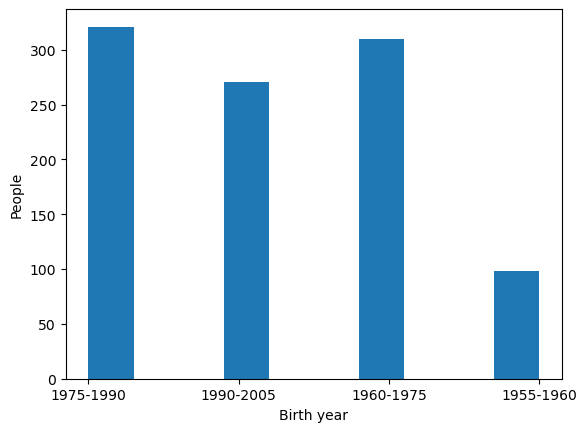

In [11]:
plt.hist(data["birth_year_ranges"])
plt.xlabel("Birth year")
plt.ylabel("People")
plt.show()

# Banding country to continent

In [13]:
# Dictionary to manually map countries that could not be mapped via pycountry_convert
continent_mapping = {
    'Korea': 'Asia',
    'Western Sahara': 'Africa',
    'Slovakia (Slovak Republic)': 'Europe',
    'Saint Barthelemy': 'North America',
    'Pitcairn Islands': 'Oceania',
    'Holy See': 'Europe',
    'Reunion': 'Africa',
    'United States Minor Outlying Islands': 'North America',
    'Antarctica (the territory South of 60 deg S)': 'Antarctica',
    'Svalbard & Jan Mayen Islands': 'Europe',
    'Bouvet Island (Bouvetoya)': 'Antarctica',
    'Saint Helena': 'Africa',
    "Cote d'Ivoire": 'Africa',
    'British Indian Ocean Territory (Chagos Archipelago)': 'Asia',
    'Palestinian Territory': 'Asia',
    'Libyan Arab Jamahiriya': 'Africa',
    'Timor-Leste': 'Asia',
    'Netherlands Antilles': 'North America',
    'Holy See (Vatican City State)': 'Europe'
}

# Function to map country to continent
def country_to_continent(country_name):
    try:
        country_code = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        if country_name in continent_mapping:
            return continent_mapping[country_name]
        else:
            return 'Unknown'


In [53]:
data['continent_of_birth'] = data['country_of_birth'].apply(country_to_continent)
data.head(10)

# finding the number of unique continent
unique_continent_counts = data['continent_of_birth'].value_counts()
unique_continent_counts
# potential problem: antartica has 3 counts and there are 72 unknowns - need to go through unknowns

continent_of_birth
Europe           228
Africa           225
Asia             206
North America    147
Oceania          117
South America     66
Antarctica        11
Name: count, dtype: int64

In [43]:
# Grouping Americas together and antarctica to oceania
data['continent_of_birth'].replace('Antarctica', 'Oceania', inplace = True)
data['continent_of_birth'].replace('South America', 'America', inplace = True)
data['continent_of_birth'].replace('North America', 'America', inplace = True)
data['continent_of_birth'].replace('Oceania', 'America', inplace = True)

# finding the number of unique continent
unique_continent_counts = data['continent_of_birth'].value_counts()
print(unique_continent_counts)

continent_of_birth
America    341
Europe     228
Africa     225
Asia       206
Name: count, dtype: int64


In [36]:
# looking at the unknowns
unknown_continent_rows = data[data['continent_of_birth'] == 'Unknown']

# Select only the 'country_of_birth' and 'continent' columns
unknown_continent_rows = unknown_continent_rows[['country_of_birth', 'continent_of_birth']]

# Display these rows
print(unknown_continent_rows)

# finding the number of unique country of birth for unknowns
unique_country_counts = unknown_continent_rows['country_of_birth'].value_counts()
unique_country_counts

                                      country_of_birth continent_of_birth
14                                               Korea            Unknown
17                               Palestinian Territory            Unknown
18                                    Saint Barthelemy            Unknown
21                                        Saint Helena            Unknown
22                                               Korea            Unknown
..                                                 ...                ...
910  British Indian Ocean Territory (Chagos Archipe...            Unknown
915               United States Minor Outlying Islands            Unknown
933       Antarctica (the territory South of 60 deg S)            Unknown
950                                            Reunion            Unknown
966                                              Korea            Unknown

[72 rows x 2 columns]


country_of_birth
Korea                                                  12
Western Sahara                                          6
Slovakia (Slovak Republic)                              6
Saint Barthelemy                                        5
Pitcairn Islands                                        5
Holy See (Vatican City State)                           5
Reunion                                                 4
United States Minor Outlying Islands                    4
Antarctica (the territory South of 60 deg S)            4
Svalbard & Jan Mayen Islands                            4
Bouvet Island (Bouvetoya)                               4
Saint Helena                                            3
Cote d'Ivoire                                           3
British Indian Ocean Territory (Chagos Archipelago)     2
Palestinian Territory                                   2
Libyan Arab Jamahiriya                                  1
Timor-Leste                                            

# Postcode

In [15]:
# Function to truncate postcode after the first numeric digit
def truncate_postcode(postcode):
    for i, char in enumerate(postcode):
        if char.isdigit():
            return postcode[:i]  # Truncate at the position of the first numeric digit
    return postcode  # Return the original postcode if no numeric digit is found

# Applying the function to create the postcode bands
data['postcode'] = data['postcode'].astype(str).apply(truncate_postcode)

# Print the updated DataFrame with the banded postcode column
print(data['postcode'])

# Find the number of unique postcodes and print
num_unique_postcodes = data['postcode'].nunique()
print("Number of unique postcodes:", num_unique_postcodes)

0      LS
1       M
2      SO
3       B
4      TQ
       ..
995    SA
996    TS
997     G
998    CT
999    SR
Name: postcode, Length: 1000, dtype: object
Number of unique postcodes: 124


In [16]:
# Importing postcode mapping to region
postcode_values = pd.read_excel('PostcodeRegions.xlsx')
postcode_values.head(10)

# Making it into a dictionary
postcode_dict = postcode_values.set_index('Postcode Area')['Region'].to_dict()

# Applying the mapping to the dataframe
data['Region'] = data['postcode'].map(postcode_dict)

# Find the number of unique regions and print
unique_regions_counts = data['Region'].value_counts()
unique_regions_counts

Region
Greater London      248
North West          184
Scotland            125
East Midlands        91
West Midlands        85
South East           72
South West           54
East of England      47
North East           43
Wales                30
Channel Islands      11
Northern Ireland      6
East England          3
Isle of Man           1
Name: count, dtype: int64

In [17]:
# Grouping to England and Other
data['Region'].replace('Greater London', 'England', inplace = True)
data['Region'].replace('North West', 'England', inplace = True)
data['Region'].replace('East Midlands', 'England', inplace = True)
data['Region'].replace('West Midlands', 'England', inplace = True)
data['Region'].replace('South East', 'England', inplace = True)
data['Region'].replace('South West', 'England', inplace = True)
data['Region'].replace('East of England', 'England', inplace = True)
data['Region'].replace('North East', 'England', inplace = True)
data['Region'].replace('East England', 'England', inplace = True)

data['Region'].replace('Scotland', 'Other', inplace = True)
data['Region'].replace('Wales', 'Other', inplace = True)
data['Region'].replace('Channel Islands', 'Other', inplace = True)
data['Region'].replace('Northern Ireland', 'Other', inplace = True)
data['Region'].replace('Isle of Man', 'Other', inplace = True)

# finding the number of unique regions
unique_region_counts = data['Region'].value_counts()
unique_region_counts

Region
England    827
Other      173
Name: count, dtype: int64

# Banding education levels

In [18]:
# Grouping Education level together
data['education_level'].replace('primary', 'pre-college', inplace = True)
data['education_level'].replace('secondary', 'pre-college', inplace = True)
data['education_level'].replace('other', 'pre-college', inplace = True)
data['education_level'].replace('bachelor', 'college and above', inplace = True)
data['education_level'].replace('masters', 'college and above', inplace = True)
data['education_level'].replace('phD', 'college and above', inplace = True)

# removing signs on blood

In [34]:
# Remove the '+' and '-' signs from the 'blood_group' column
data['blood_groupn'] = data['blood_group'].str.replace('+', '').str.replace('-', '')
data.head(10)

# checking number of unique values
unique_blood_group = data['blood_groupn'].value_counts()
unique_blood_group

blood_groupn
A     431
O     430
B     108
AB     31
Name: count, dtype: int64

# Weight ranges

In [23]:
# Before banding, determining range of weight by finding minimum and maximum values
min_weight = data['weight'].min() # 35.0
max_weight = data['weight'].max() # 100.0

print(f"Minimum weight: {min_weight}")
print(f"Maximum weight: {max_weight}")

Minimum weight: 35.0
Maximum weight: 100.0


weight_ranges
35-45     170
75-85     155
85-95     155
45-55     152
65-75     151
55-65     139
95-105     78
Name: count, dtype: int64


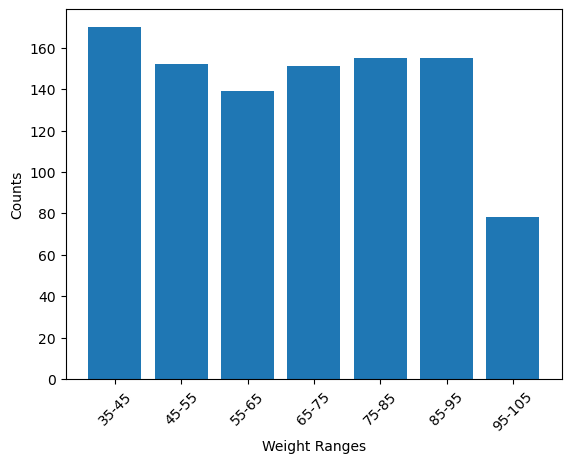

Number of unique weight ranges: 7


In [24]:
# Creating banding categories for weight with increments of 10 per category
weight_bins = [35, 45, 55, 65, 75, 85, 95, 105]
weight_labels = ["35-45", "45-55", "55-65", "65-75", "75-85", "85-95", "95-105"]  # Define labels for each bin
data["weight_ranges"] = pd.cut(data['weight'], bins=weight_bins, labels=weight_labels, right=False)

# Obtaining counts of weight ranges
counts_weight = data["weight_ranges"].value_counts()
count_in_order_weight = [counts_weight[label] for label in weight_labels]  # Corrected variable name
print(counts_weight)

# Plotting counts of weight ranges
plt.bar(weight_labels, count_in_order_weight)  # Corrected variable name
plt.xlabel("Weight Ranges")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show()

# Finding number of unique weight ranges
num_unique_weight_ranges = data['weight_ranges'].nunique()
print("Number of unique weight ranges:", num_unique_weight_ranges)

# Height ragnges


In [25]:
# Finding minimum and maximum heights
min_height = data['height'].min() # 1.4
max_height = data['height'].max() # 2.0

print(f"Minimum height: {min_height}")
print(f"Maximum height: {max_height}")

Minimum height: 1.4
Maximum height: 2.0


height_ranges
1.8-2.0    349
1.4-1.6    339
1.6-1.8    312
Name: count, dtype: int64


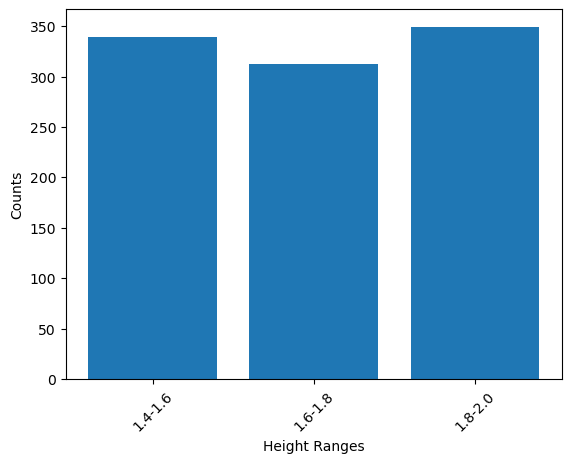

Number of unique height categories: 3


In [26]:
# Banding height into increments of 0.2
height_bins = [1.4, 1.6, 1.8, 2.1]  # Ranges for categories: 1.4-1.6, 1.6-1.8, 1.8-2.0 (adjust upper bound to include 2.0)
height_labels = ['1.4-1.6', '1.6-1.8', '1.8-2.0']  # Labels for the categories

# Banding heights into specified ranges
data['height_ranges'] = pd.cut(data['height'], bins=height_bins, labels=height_labels, right=False)

# Showing counts of height ranges
counts_height = data['height_ranges'].value_counts()
count_in_order_height = [counts_height[label] for label in height_labels]
print(counts_height)

# Plotting count of height ranges
plt.bar(height_labels, count_in_order_height)
plt.xlabel("Height Ranges")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show()

# Finding the number of unique height categories
num_unique_height_ranges = data['height_ranges'].nunique()
print("Number of unique height categories:", num_unique_height_ranges)

# Drinking

In [27]:
bins= [0,1,4,14]
labels = ["never", "light", "moderate"]
data["avg_n_drinks_per_week_group"] = pd.cut(data['avg_n_drinks_per_week'], bins=bins, labels=labels, right=False)

avg_n_drinks_per_week_group
moderate    568
light       343
never        89
Name: count, dtype: int64


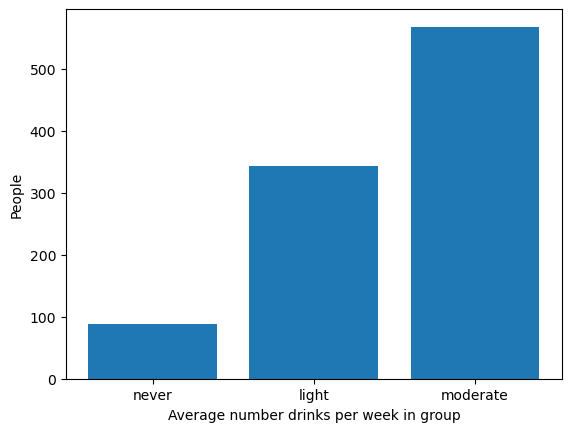

In [28]:
drinks_counts = data["avg_n_drinks_per_week_group"].value_counts()
drinks_count_in_order = []
for i in labels:
    drinks_count_in_order.append(drinks_counts[i])
print(drinks_counts)

plt.bar(labels, drinks_count_in_order)
plt.xlabel("Average number drinks per week in group")
plt.ylabel("People")
plt.show()

# Cigar


In [29]:
bins= [0,200,400,600]
labels = ["light", "moderate", "heavy"]
data["avg_n_cigret_per_week_group"] = pd.cut(data['avg_n_cigret_per_week'], bins=bins, labels=labels, right=False)

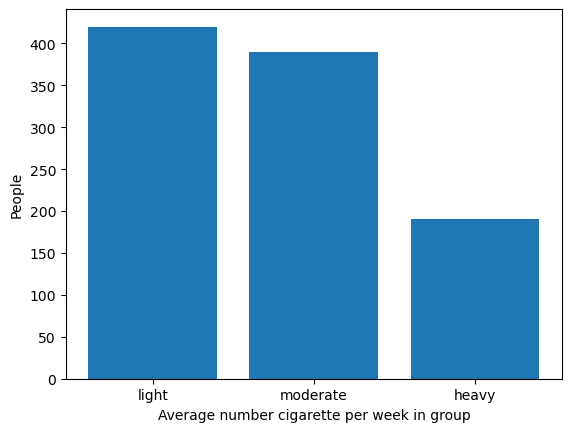

In [30]:
counts = data["avg_n_cigret_per_week_group"].value_counts()
count_in_order = []
for i in labels:
    count_in_order.append(counts[i])

plt.bar(labels, count_in_order)
plt.xlabel("Average number cigarette per week in group")
plt.ylabel("People")
plt.show()

# Countries visited


In [31]:
bins = list(range(0, max(data['n_countries_visited'])+1, 5))

labels = [f"{start + 1}-{end}" for start, end in zip(bins[:-1], bins[1:])]
print(labels)

# Create a new column n_countries_range with new bins
data['n_countries_range'] = pd.cut(data['n_countries_visited'], bins=bins, labels=labels, include_lowest=True)

# Count the occurrences in each bin and print it 
range_counts = data['n_countries_range'].value_counts()
print("Values in ranges of 5 and their counts:")
print(range_counts)

['1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50']
Values in ranges of 5 and their counts:
n_countries_range
31-35    122
21-25    115
36-40    110
6-10     108
26-30    104
41-45    102
16-20     92
11-15     88
46-50     83
1-5       76
Name: count, dtype: int64


# Creating the dataset

In [44]:
# Order of columns:
cols_gov = ['sample_ID', 'gender','birth_year_ranges', 'continent_of_birth', 'current_country', 'Region', 'weight_ranges', 'height_ranges', 'blood_groupn', 'avg_n_drinks_per_week_group', 'avg_n_cigret_per_week_group', 'education_level', 'n_countries_range','cc_status']
cols_res = ['sample_ID', 'gender','birth_year_ranges', 'continent_of_birth', 'current_country', 'Region', 'weight', 'height', 'blood_group', 'avg_n_drinks_per_week', 'avg_n_cigret_per_week', 'education_level', 'n_countries_visited','cc_status']

In [45]:
# Generating final dataset for gov/public
final_data_gov = data[cols_gov]
# EXPORTING
final_data_gov.to_csv("final_data_gov.csv", index=False)

In [46]:
test = pd.read_csv('final_data_gov.csv')

In [56]:
quasi_identifiers_gov = ['gender', 'birth_year_ranges', 'continent_of_birth', 'education_level','Region']
groups = test.groupby(quasi_identifiers_gov).size()
groups.min()
groups[groups == 1]


gender  birth_year_ranges  continent_of_birth  education_level    Region
F       1955-1960          Africa              pre-college        Other     1
                           America             pre-college        Other     1
                           Asia                college and above  Other     1
                                               pre-college        Other     1
        1960-1975          Asia                college and above  Other     1
                           Europe              college and above  Other     1
        1975-1990          Asia                pre-college        Other     1
        1990-2005          Europe              college and above  Other     1
M       1955-1960          America             pre-college        Other     1
                           Asia                college and above  Other     1
                           Europe              college and above  Other     1
        1960-1975          Asia                college and above  Oth